In [1]:
import matplotlib.pyplot as plt

In [5]:
log_file = open('weights/logs.log', 'r')
log_data = log_file.readlines()


In [13]:
losses = []
cers = []
wers = []
val_losses = []
val_cers = []
val_wers = []

def extract_info(line):
    line = line.split()
    extracted_data = {}
    for i, word in enumerate(line):
        if i == 10:
            extracted_data['loss'] = float(word[:-1])
        if i == 12:
            extracted_data['cer'] = float(word[:-1])
        if i == 14:
            extracted_data['wer'] = float(word[:-1])
        if i == 16:
            extracted_data['val_loss'] = float(word[:-1])
        if i == 18:
            extracted_data['val_cer'] = float(word[:-1])
        if i == 20:
            extracted_data['val_wer'] = float(word[:-1])
    
    return extracted_data

# print(extract_info(log_data[1]))

for line in log_data:
    if 'Epoch' in line:
        epoch_log_data = extract_info(line)
        losses.append(epoch_log_data['loss'])
        cers.append(epoch_log_data['cer'])
        wers.append(epoch_log_data['wer'])
        val_losses.append(epoch_log_data['val_loss'])
        val_cers.append(epoch_log_data['val_cer'])
        val_wers.append(epoch_log_data['val_wer'])


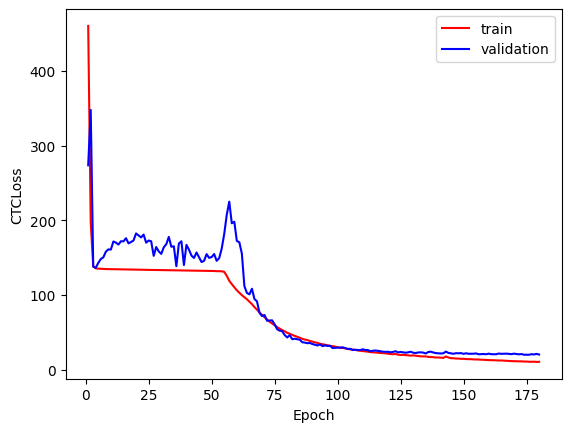

In [21]:
def draw_metric_information(train_data, val_data, y_label):
  k = 180
  x_axis = list(range(1,k + 1,1))

  plt.xlabel("Epoch")
  plt.ylabel(y_label)
  plt.plot(x_axis, train_data, color="r", label = 'train')
  plt.plot(x_axis, val_data, color="b", label = 'validation')
  plt.legend()
  plt.show()

draw_metric_information(losses, val_losses, 'CTCLoss')

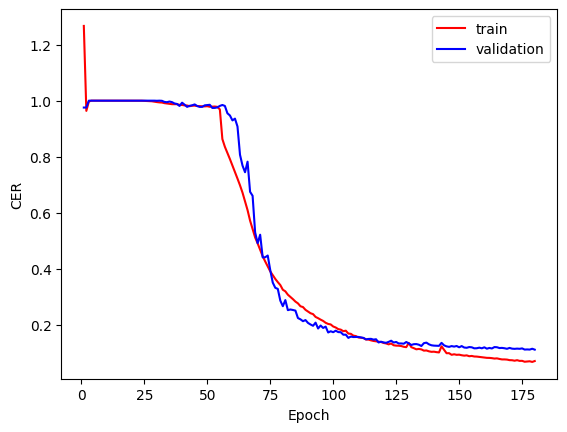

In [22]:
draw_metric_information(cers, val_cers, 'CER')

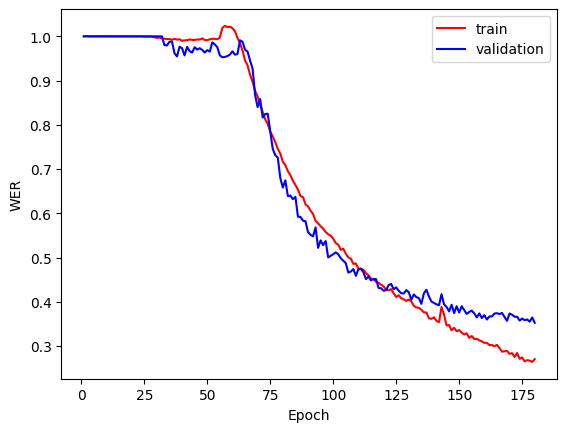

In [20]:
draw_metric_information(wers, val_wers, 'WER')